# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [4]:
training_data = pd.read_csv('training_set.csv')

In [5]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-03,553.979065,556.372498,551.715271,553.699829,553.699829,1382200
1,2014-11-04,551.485901,553.979065,547.796021,552.592834,552.592834,1244200
2,2014-11-05,555.275513,555.275513,542.560425,544.425293,544.425293,2032200
3,2014-11-06,544.006409,545.387634,539.488831,540.555908,540.555908,1333200
4,2014-11-07,544.714478,544.714478,537.195129,539.528748,539.528748,1633700


In [6]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2019-10-24,1260.900024,1264.000000,1253.714966,1260.989990,1260.989990,1028100
1253,2019-10-25,1251.030029,1269.599976,1250.010010,1265.130005,1265.130005,1213100
1254,2019-10-28,1275.449951,1299.310059,1272.540039,1290.000000,1290.000000,2613200
1255,2019-10-29,1276.229980,1281.589966,1257.212036,1262.619995,1262.619995,1886400
1256,2019-10-30,1252.969971,1269.359985,1252.000000,1261.290039,1261.290039,1408900


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [8]:
training_set = training_data.iloc[:, 1:2].values

In [9]:
training_set.shape, training_data.shape

((1257, 1), (1257, 7))

In [10]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.07750766],
       [0.07432328],
       [0.07916355],
       ...,
       [0.99900371],
       [1.        ],
       [0.97029124]])

In [12]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1257):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train

array([[0.07750766, 0.07432328, 0.07916355, ..., 0.04498879, 0.03583056,
        0.0208258 ],
       [0.07432328, 0.07916355, 0.06477013, ..., 0.03583056, 0.0208258 ,
        0.02701621],
       [0.07916355, 0.06477013, 0.0656745 , ..., 0.0208258 , 0.02701621,
        0.0472306 ],
       ...,
       [0.90358069, 0.86436929, 0.85577344, ..., 0.95673967, 0.98041987,
        0.96781345],
       [0.86436929, 0.85577344, 0.8464367 , ..., 0.98041987, 0.96781345,
        0.99900371],
       [0.85577344, 0.8464367 , 0.88070516, ..., 0.96781345, 0.99900371,
        1.        ]])

In [34]:
y_train

array([0.02701621, 0.0472306 , 0.04247951, ..., 0.99900371, 1.        ,
       0.97029124])

In [15]:
x_train.shape

(1197, 60)

In [16]:
# reshaping dataset
x_train = x_train.reshape(1197, 60, 1)

In [17]:
x_train.shape

(1197, 60, 1)

# Step 3: Building LSTM

In [18]:
# define an object (initializing RNN)
model = tf.keras.models.Sequential()

In [19]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [20]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Training the model

In [23]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 6s 97ms/step - loss: 0.1027
Epoch 2/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0104
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0069
Epoch 4/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0067
Epoch 5/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0074
Epoch 6/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0061
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0062
Epoch 8/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0056
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0054
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0051
Epoch 13/100
3

# Step 5: Making Predictions

In [26]:
# getting the real stock prices of month Nov 2019
test_data = pd.read_csv('test_set.csv')

In [27]:
test_data.shape

(20, 7)

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [29]:
real_stock_price = test_data.iloc[:, 1:2].values

In [30]:
real_stock_price.shape

(20, 1)

In [31]:
# Getting predicted stock prices of month Nov 2019

# concatination
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# stock prices of previous 60 days for each day of Nov 2019
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

# convert in numpy array
x_test = np.array(x_test)

# convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 480ms/step


In [32]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[1252.0077]
[1305.280029]


(None, None)

# Step 6: Visualization

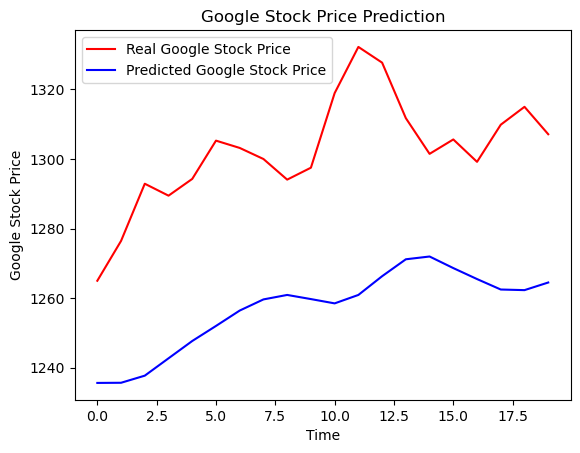

In [33]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()